In [25]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import networkx as nx

In [26]:
X = pd.read_csv('clean_data')

In [27]:
X.drop(columns=['Unnamed: 0'],inplace=True)
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,69,0,0,964,3,2,3,3,...,2,5,5,3,5,1,5,3,0,0
1,0,0,55,1,2,240,2,5,5,5,...,2,1,1,2,3,2,3,2,163,0
2,1,0,51,1,2,2672,5,5,5,5,...,1,4,4,4,4,5,4,3,0,1
3,0,1,27,1,0,495,2,3,2,2,...,3,3,4,4,3,4,2,3,0,0
4,0,0,12,0,0,462,2,4,2,3,...,2,2,3,4,2,2,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,49,0,0,1587,3,4,3,4,...,5,4,4,3,5,3,4,5,35,0
5996,1,0,33,0,0,588,2,5,2,3,...,5,5,5,3,5,5,5,5,0,0
5997,0,0,50,0,0,2358,1,4,1,5,...,4,4,4,5,4,4,3,4,0,0
5998,0,0,35,0,0,672,2,3,2,2,...,5,5,1,1,4,4,1,5,0,0


In [28]:
A = np.loadtxt('adjacency_matrix.csv',delimiter=',')

In [29]:
G = nx.from_numpy_matrix(A)

In [30]:
nx.is_connected(G)

True

In [31]:
#nx.draw(G,node_size=20)

In [32]:
features = pd.Series(X.satisfaction) 

In [9]:
color_map = []
for i in features.items():
    if i[1] == 0:
        color_map.append('red')
    else:
        color_map.append('blue')

In [10]:
pos = nx.spring_layout(G)

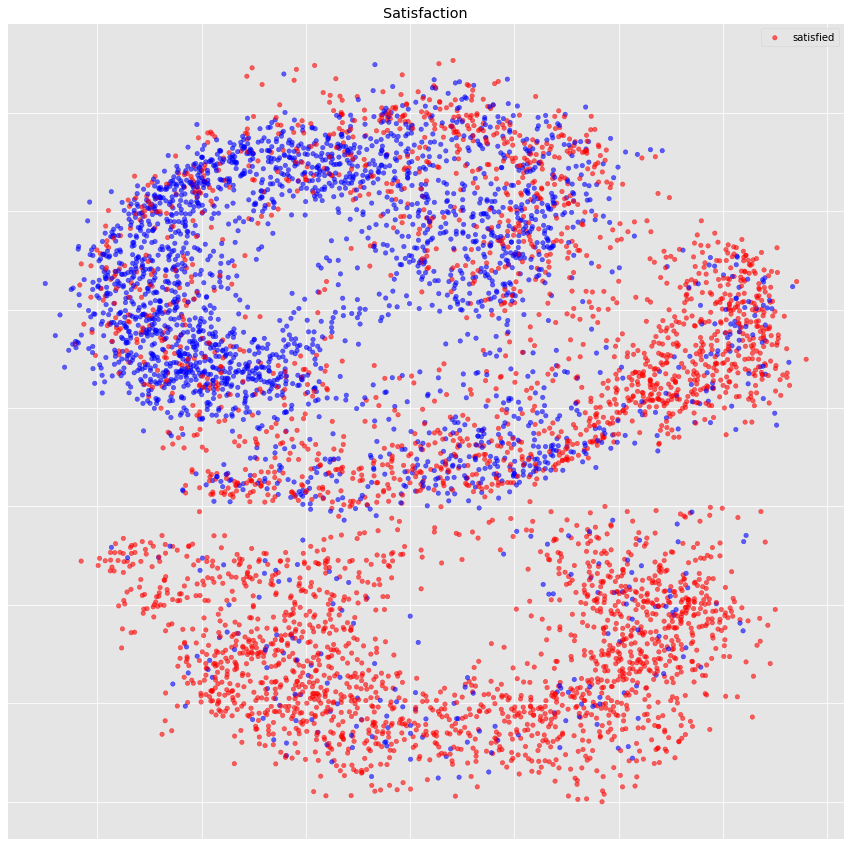

In [11]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend(['satisfied' ,'dissatisfied or neutral'])
plt.title('Satisfaction')
plt.show()

<AxesSubplot:>

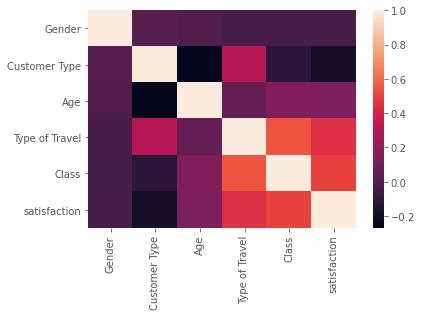

In [12]:
import seaborn as sns
cormap_vars = X[['Gender','Customer Type','Age','Type of Travel','Class','satisfaction']]
cormap = cormap_vars.corr()
sns.heatmap(cormap)

In [13]:
colmapvar = pd.Series(X['Gender']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')

No handles with labels found to put in legend.


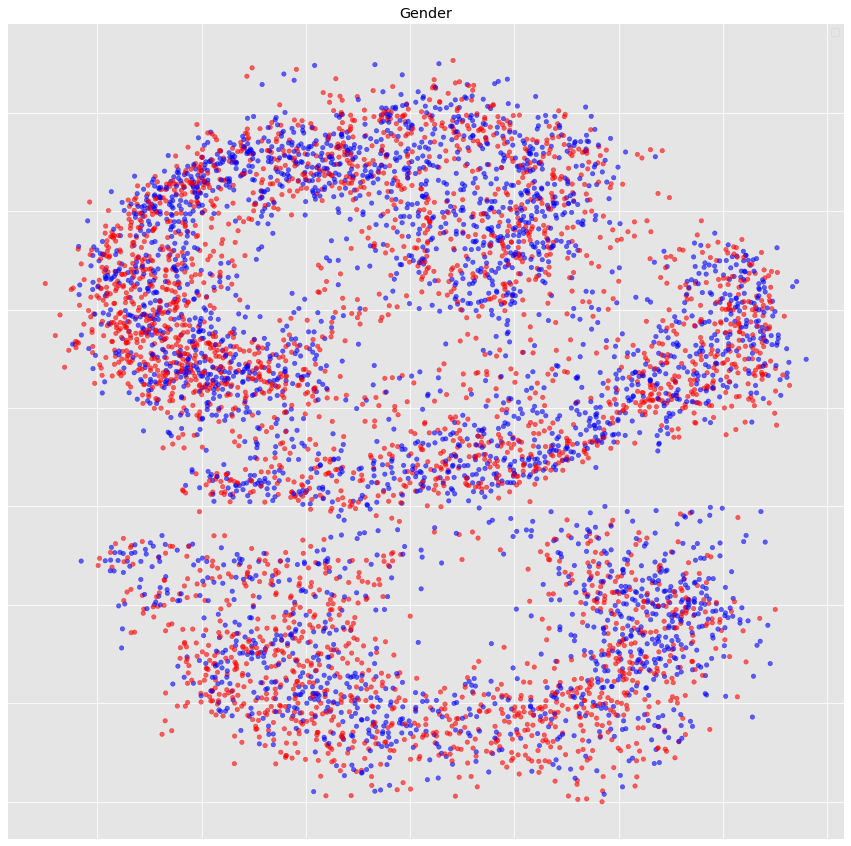

In [14]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Gender')
plt.show()

In [15]:
colmapvar = pd.Series(X['Customer Type']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')

No handles with labels found to put in legend.


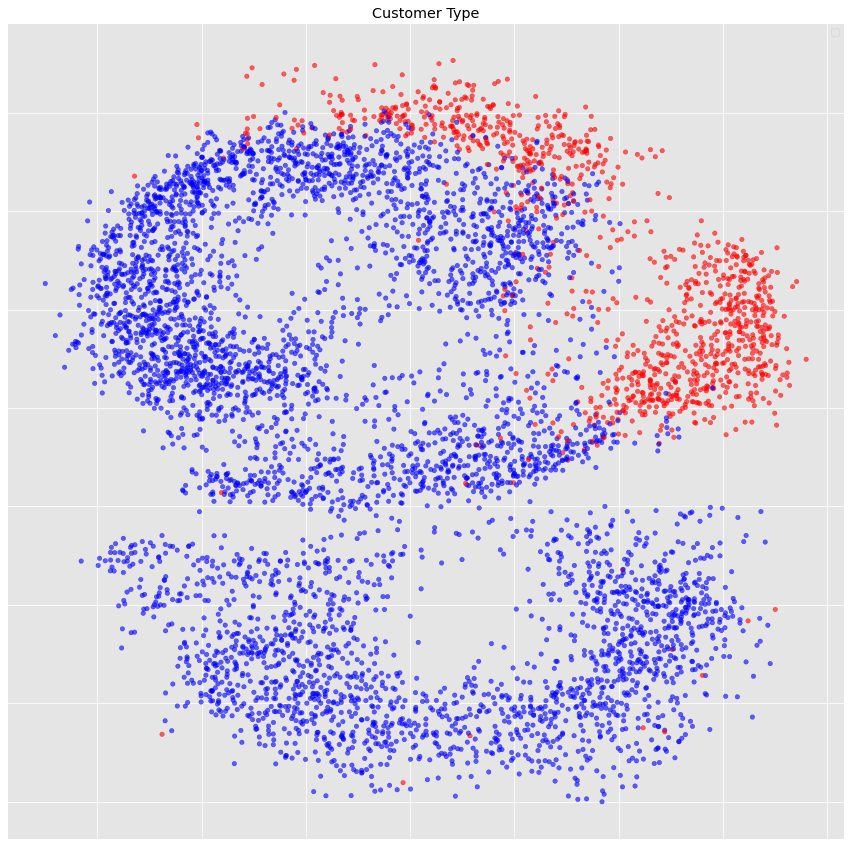

In [16]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Customer Type')
plt.show()

In [17]:
colmapvar = pd.Series(X['Class']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    elif i[1] == 1:
        color_map.append('red')
    else:
        color_map.append('green')

No handles with labels found to put in legend.


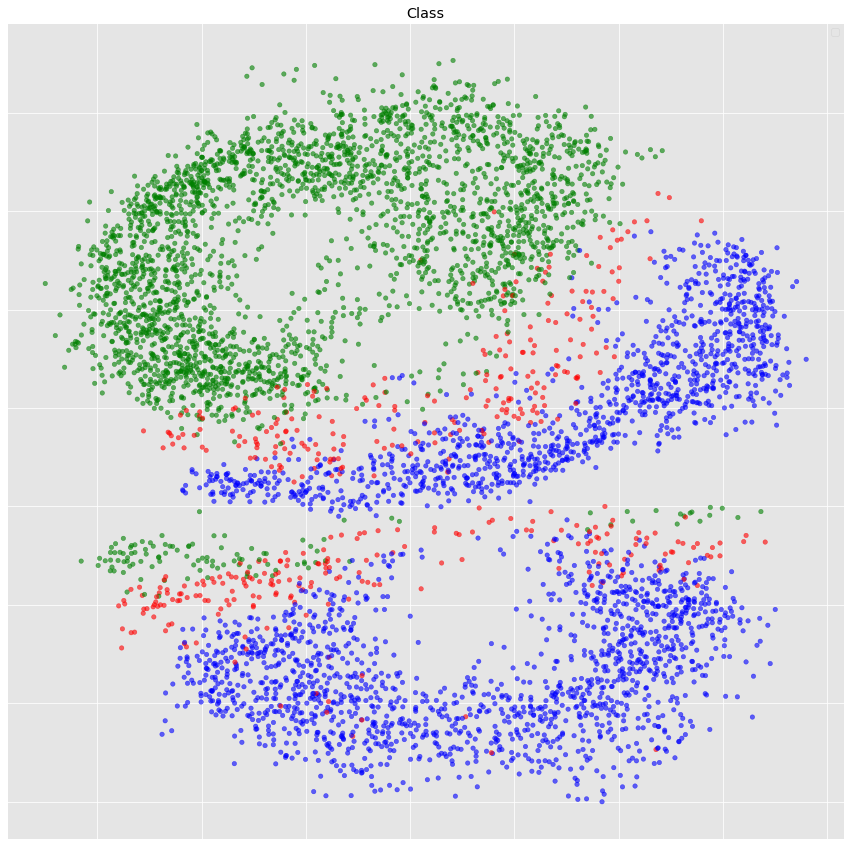

In [18]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Class')
plt.show()

In [19]:
colmapvar = pd.Series(X['Type of Travel']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')


No handles with labels found to put in legend.


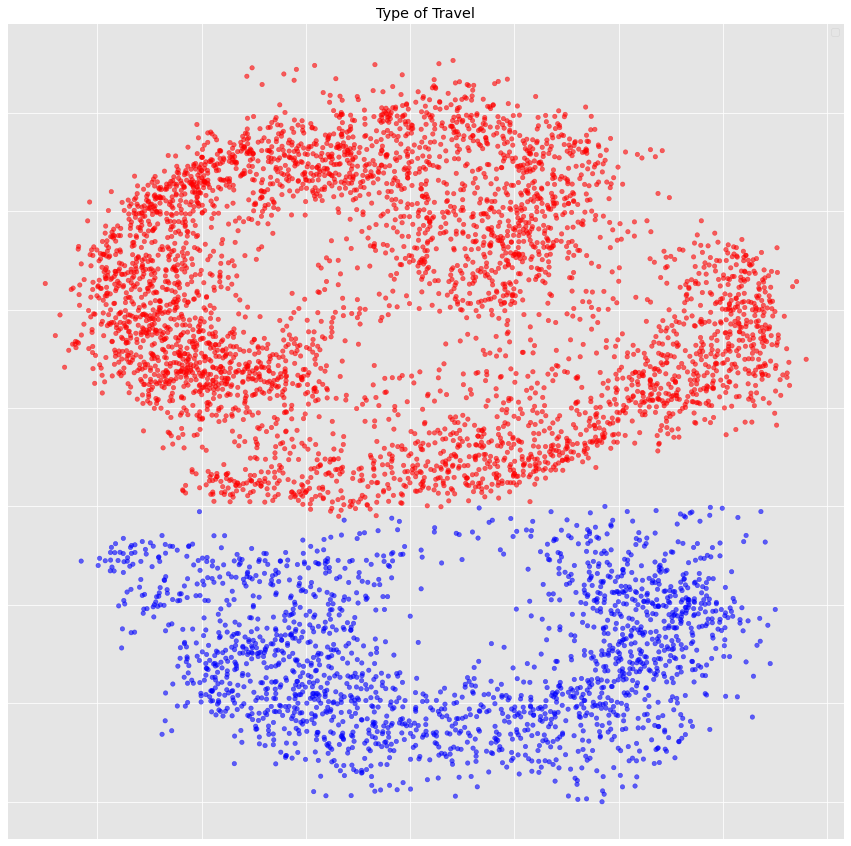

In [20]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Type of Travel')
plt.show()

In [21]:
colmapvar = pd.Series(X['Age']) 
colmapvar = colmapvar.apply(lambda x: 0 if x < 26 else(1 if x < 39 else(2 if x < 50 else 3)))
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    elif i[1] == 1:
        color_map.append('red')
    elif i[1] == 2:
        color_map.append('green')
    elif i[1] == 3:
        color_map.append('brown')
    else:
        color_map.append('purple')

No handles with labels found to put in legend.


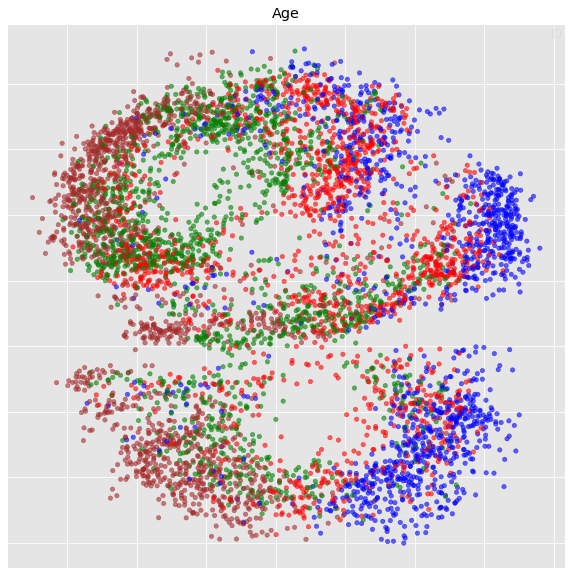

In [22]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Age')
plt.show()

In [23]:
# node2vec
t = pd.read_csv('embeddings_5', delimiter = " ", index_col=0, header = None)
t.sort_index(inplace=True)
t = t.to_numpy()
t.shape

(6000, 5)

In [24]:
Z = pd.DataFrame(t,columns = ['x1','x2'])
Z['features'] = features

ValueError: Shape of passed values is (6000, 5), indices imply (6000, 2)

In [ ]:
import statsmodels.api as sm
P = sm.add_constant(t) 
log_reg = sm.Logit(features, P).fit()

In [ ]:
print(log_reg.summary())

In [ ]:
predictions = log_reg.predict(P) 

yhat_log = np.empty((len(predictions),1))

for i in range(len(predictions)):
    if predictions[i] < 0.5:
        yhat_log[i] = 0
    else:         
        yhat_log[i] = 1

In [33]:
from sklearn.model_selection import train_test_split
f = pd.get_dummies(features)
x_train, x_test, y_train, y_test = train_test_split(t,f, test_size = 0.7, shuffle=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=60, batch_size=1)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Classification Accuracy validation set {}'.format(accuracy_score(features,yhat_log)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(features,yhat_log))

NameError: name 'yhat_log' is not defined

In [35]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.scatterplot(x=Z.x1,y=Z.x2,hue=X['Class'],alpha=0.8)
plt.show()

NameError: name 'Z' is not defined

<Figure size 1080x1080 with 0 Axes>

In [36]:
import dgl
import dgl.nn as dglnn
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler

G_dgl = dgl.from_networkx(G)
feat = X.drop(columns=['satisfaction'])
feat = pd.get_dummies(feat)
scale = StandardScaler()
feat = pd.DataFrame(scale.fit_transform(feat))

embedding = nn.Parameter(torch.tensor(feat.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl.ndata['feat'] =  embedding
G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.3)
G_dgl.ndata['label'] = torch.tensor(features)

Using backend: pytorch


In [ ]:
G_dgl.ndata['val_mask'] = torch.empty(len(G_dgl.nodes()))
for i in range(len(G_dgl.ndata['train_mask'])):
    if G_dgl.ndata['train_mask'][i] == True:
        G_dgl.ndata['val_mask'][i] = False
    else:
        G_dgl.ndata['val_mask'][i] = True

G_dgl.ndata['val_mask'] = G_dgl.ndata['val_mask'].type(torch.bool)

In [ ]:
# Contruct a two-layer GNN model

class SAGE(nn.Module):
    def __init__(self, in_feats, hid_feats_1, hid_feats_2, hid_feats_3, out_feats):
        super().__init__()
        self.conv1 = dglnn.pytorch.conv.SAGEConv(
            in_feats=in_feats, out_feats=hid_feats_1, aggregator_type='mean', feat_drop=0.1)
        
        self.conv2 = dglnn.pytorch.conv.SAGEConv(
            in_feats=hid_feats_1, out_feats=hid_feats_1, aggregator_type='mean', feat_drop=0.1)
        
        self.conv3 = dglnn.pytorch.conv.SAGEConv(
            in_feats=hid_feats_1, out_feats=out_feats, aggregator_type='mean', feat_drop=0.1)
        
#        self.conv4 = dglnn.pytorch.conv.SAGEConv(
#            in_feats=hid_feats_3, out_feats=out_feats, aggregator_type='mean')

    def forward(self, graph, inputs):
        # inputs are features of nodes
        h = self.conv1(graph, inputs)
        h = F.normalize(h, p=2, dim=-1)
        h = F.relu(h)
        h = self.conv2(graph, h)
        h = F.normalize(h, p=2, dim=-1)
        h = F.relu(h)
        h = self.conv3(graph, h)
#        h = F.normalize(h, p=2, dim=-1)
#        h = F.relu(h)
#        h = self.conv4(graph,h)
        h = F.normalize(h, p=2, dim=-1)
        h = F.log_softmax(h,dim=1)
        return h

In [ ]:
def evaluate(model, graph, features, labels, mask):
    model.eval()
    with torch.no_grad():
        logits = model(graph, features)
        logits = logits[mask]
        labels = labels[mask]
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

In [ ]:
node_features = G_dgl.ndata['feat']
node_labels = G_dgl.ndata['label']
train_mask = G_dgl.ndata['train_mask']
valid_mask = G_dgl.ndata['val_mask']
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [ ]:

model = SAGE(in_feats=n_features, hid_feats_1=120, hid_feats_2 = 100, hid_feats_3=40, out_feats=n_labels)
opt = torch.optim.Adam(model.parameters())
plot_loss_train = []
plot_loss_val = []
valid_acc = []
train_acc = []
dur = []
for epoch in range(200):
    t0 = time.time()
    model.train()
    # forward propagation by using all nodes
    logits = model(G_dgl, node_features)
    # compute loss
    loss_train = F.cross_entropy(logits[train_mask], node_labels[train_mask])
    loss_val = F.cross_entropy(logits[valid_mask], node_labels[valid_mask])
    plot_loss_train.append(loss_train.item())
    plot_loss_val.append(loss_val.item())
    # compute validation accuracy
    acc_val = evaluate(model, G_dgl, node_features, node_labels, valid_mask)
    acc_train = evaluate(model, G_dgl, node_features, node_labels, train_mask)
    valid_acc.append(acc_val)
    train_acc.append(acc_train)
    
    # backward propagation
    opt.zero_grad()
    loss_train.backward()
    opt.step()
    dur.append(time.time() - t0)
    
    if epoch % 1 == 0:
        print('Epoch: {}, train loss: {:.4f}, validation loss: {:.4f}, training accuracy: {:.4f}, validation accuracy: {:.4f}, Time: {:.4f}'.format(epoch,loss_train.item(),loss_val.item(),acc_train,acc_val,np.mean(dur)))


In [ ]:
plt.plot(plot_loss_train,label='Training Loss')
plt.plot(plot_loss_val,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(train_acc,label='Training Accuracy')
plt.plot(valid_acc,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
val_tens = torch.tensor(features)
_, indices_val = torch.max(logits[valid_mask], dim=-1)
val_lab = val_tens[valid_mask]
train_lab = val_tens[train_mask]
_, indices_train = torch.max(logits[train_mask], dim=-1)

print('Classification Accuracy validation set {}'.format(accuracy_score(val_lab,indices_val)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(train_lab,indices_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(val_lab, indices_val))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(train_lab,indices_train))


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(val_lab,indices_val)

In [ ]:
class GCN(nn.Module):
    def __init__(self, in_feats, hid_feats_1, hid_feats_2, out_feats):
        super().__init__()
        self.conv1 = dglnn.pytorch.conv.GraphConv(
            in_feats=in_feats, out_feats=hid_feats_1)
        
        self.conv2 = dglnn.pytorch.conv.GraphConv(
            in_feats=hid_feats_1, out_feats=out_feats)
        
#        self.conv3 = dglnn.pytorch.conv.GraphConv(
#            in_feats=hid_feats_2, out_feats=out_feats)

    def forward(self, graph, inputs):
        # inputs are features of nodes
        h = self.conv1(graph, inputs)
        h = F.relu(h)
        h = self.conv2(graph, h)
#        h = F.relu(h)
#        h = self.conv3(graph,h)
        h = F.log_softmax(h,dim=1)
        return h

In [ ]:
model = GCN(in_feats=n_features, hid_feats_1=100, hid_feats_2=50, out_feats=n_labels)
opt = torch.optim.Adam(model.parameters())
plot_loss_train = []
plot_loss_val = []
valid_acc = []
train_acc = []
dur = []
for epoch in range(150):
    t0 = time.time()
    model.train()
    # forward propagation by using all nodes
    logits = model(G_dgl, node_features)
    # compute loss
    loss_train = F.cross_entropy(logits[train_mask], node_labels[train_mask])
    loss_val = F.cross_entropy(logits[valid_mask], node_labels[valid_mask])
    plot_loss_train.append(loss_train.item())
    plot_loss_val.append(loss_val.item())
    # compute validation accuracy
    acc_val = evaluate(model, G_dgl, node_features, node_labels, valid_mask)
    acc_train = evaluate(model, G_dgl, node_features, node_labels, train_mask)
    valid_acc.append(acc_val)
    train_acc.append(acc_train)
    # backward propagation
    opt.zero_grad()
    loss_train.backward()
    opt.step()
    dur.append(time.time() - t0)
    if epoch % 10 == 0:
        print('Epoch: {}, train loss: {:.4f}, validation loss: {:.4f}, training accuracy: {:.4f}, validation accuracy: {:.4f}, Time: {:.4f}'.format(epoch,loss_train.item(),loss_val.item(),acc_train,acc_val,np.mean(dur)))


In [ ]:
plt.plot(plot_loss_train,label='Training Loss')
plt.plot(plot_loss_val,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(train_acc,label='Training Accuracy')
plt.plot(valid_acc,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:

val_tens = torch.tensor(features)
_, indices_val = torch.max(logits[valid_mask], dim=1)
val_lab = val_tens[valid_mask]
train_lab = val_tens[train_mask]
_, indices_train = torch.max(logits[train_mask], dim=1)

print('Classification Accuracy validation set {}'.format(accuracy_score(val_lab,indices_val)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(train_lab,indices_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(val_lab, indices_val))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(train_lab,indices_train))


In [ ]:
roc_auc_score(val_lab,indices_val)

In [ ]:
from sklearn.model_selection import train_test_split
f = pd.get_dummies(features)
x_train, x_test, y_train, y_test = train_test_split(feat,f, test_size = 0.7, shuffle=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=60, batch_size=5)

In [ ]:
plt.plot(history.history['loss'],label = 'Training Loss', color = 'blue')
plt.plot(history.history['val_loss'],label = 'Validation Loss', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['accuracy'],label = 'Training accuracy', color = 'blue')
plt.plot(history.history['val_accuracy'],label = 'Validation accuracy', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.show()

In [37]:
from sklearn import svm

svm_y = np.empty((len(features),1))

for i in range(len(features)):
    if features.iloc[i] == 1:
        svm_y[i] = 1
    else:
        svm_y[i] = -1

svm_y.astype(int)
x_train, x_test, y_train, y_test = train_test_split(feat,svm_y, test_size = 0.6, shuffle=True)


clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9570833333333333
0.9308333333333333


In [38]:
yhat_svm = clf.predict(x_test)
yhat_train_svm = clf.predict(x_train)

print('Classification Accuracy validation set {}'.format(accuracy_score(y_test,yhat_svm)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(yhat_train_svm,y_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(y_test,yhat_svm))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(yhat_train_svm,y_train))

Classification Accuracy validation set 0.9308333333333333
-------------------------------------------------------------
Classification Accuracy training set 0.9570833333333333
-------------------------------------------------------------
Confusion Matrix validation set:
[[1951   75]
 [ 174 1400]]
-------------------------------------------------------------
Confusion Matrix training set:
[[1351   57]
 [  46  946]]


In [39]:
import statsmodels.api as sm

x_train, x_test, y_train, y_test = train_test_split(feat,features, test_size = 0.6, shuffle=True)

log_reg = sm.Logit(y_train, x_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.347972
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                 2400
Model:                          Logit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           20
Date:                Mon, 24 May 2021   Pseudo R-squ.:                  0.4888
Time:                        15:02:46   Log-Likelihood:                -835.13
converged:                       True   LL-Null:                       -1633.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0358      0.063     -0.569      0.569      -0.159       0.088
1             -0.8650      0.

In [40]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(x_train, y_train)
print(clf.score(x_test, y_test))
print(clf.score(x_train,y_train))

0.8819444444444444
0.8729166666666667


In [41]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

clf = QDA()
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.8654166666666666
0.8663888888888889
